In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
yt_df = pd.read_csv("USvideosv.csv")
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [54]:
corr_likes = yt_df['views'].corr(yt_df['likes'])
corr_dislikes = yt_df['views'].corr(yt_df['dislikes'])
corr_table = yt_df[['views', 'likes', 'dislikes', 'comment_count']].corr()
corr_table


,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


In [55]:

# yt_df_sorted = yt_df.sort_values("views", ascending=False)
# yt_df_top20 = yt_df_sorted.head(20)

# plt.figure(figsize=(10, 6))

# plt.plot(
#     yt_df_top20["views"],
#     yt_df_top20["likes"],
#     color="lime",
#     label="Likes",
#     linewidth=2,
#     marker="o"
# )

# plt.plot(
#     yt_df_top20["views"],
#     yt_df_top20["dislikes"],
#     color="red",
#     label="Dislikes",
#     linewidth=2,
#     marker="o"
# )

# plt.ticklabel_format(style="plain", axis="x")
# plt.gca().get_xaxis().set_major_formatter(
#     plt.FuncFormatter(lambda x, _: f"{x/1_000:.0f}K" if x < 1_000_000 else f"{x/1_000_000:.1f}M")
# )

# plt.title("Likes and Dislikes Compared to Views (Top 20 Videos)", fontsize=14, fontweight="bold")
# plt.xlabel("Number of Views")
# plt.ylabel("Number of Reactions (Likes / Dislikes)")
# plt.legend()
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()


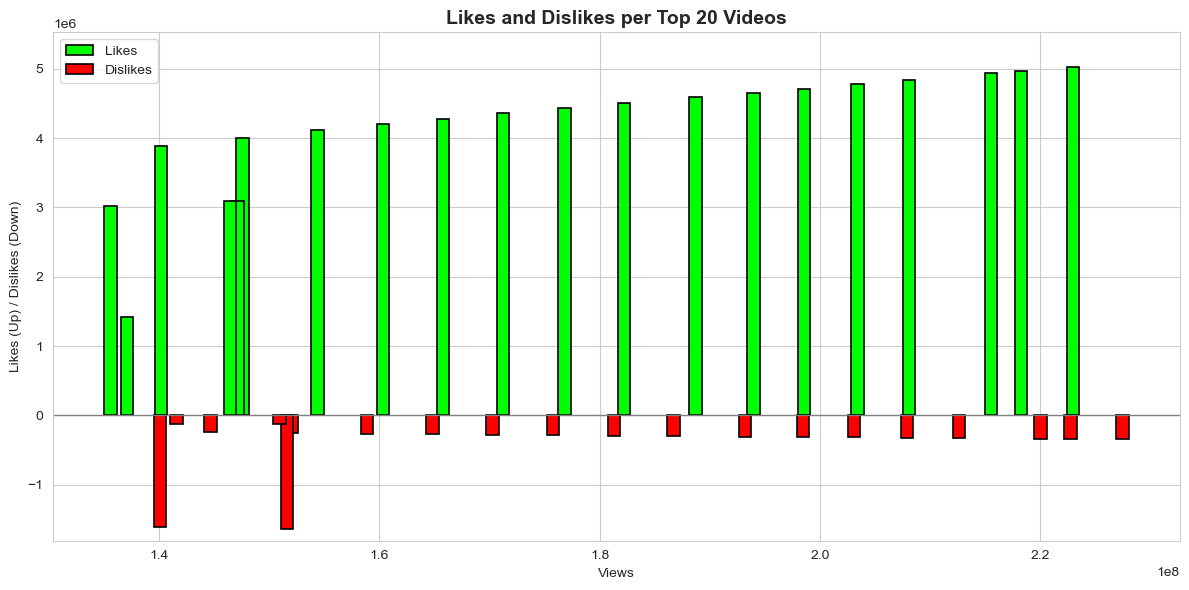

In [56]:
yt_df_sorted = yt_df.sort_values("views", ascending=False)
yt_df_top20 = yt_df_sorted.head(20)

plt.figure(figsize=(12, 6))

# keep bars from touching
bar_width = yt_df_top20["views"].max() / 120
offset = bar_width * 1.2

plt.bar(
    yt_df_top20["views"] - offset,
    yt_df_top20["likes"],
    color="lime",
    label="Likes",
    width=bar_width * 0.6,
    edgecolor="black",
    linewidth=1.2
)

plt.bar(
    yt_df_top20["views"] + offset,
    -yt_df_top20["dislikes"],
    color="red",
    label="Dislikes",
    width=bar_width * 0.6,
    edgecolor="black",
    linewidth=1.2
)

plt.axhline(0, color="gray", linewidth=1)

max_likes = yt_df_top20["likes"].max()
max_dislikes = yt_df_top20["dislikes"].max()

# buffer from T/B
plt.ylim(-max_dislikes * 1.1, max_likes * 1.1)


plt.title("Likes and Dislikes per Top 20 Videos", fontsize=14, fontweight="bold")
plt.xlabel("Views")
plt.ylabel("Likes (Up) / Dislikes (Down)")
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
# # Convert columns to numeric
# yt_df["views"] = pd.to_numeric(yt_df["views"], errors="coerce")
# yt_df["likes"] = pd.to_numeric(yt_df["likes"], errors="coerce")
# yt_df["dislikes"] = pd.to_numeric(yt_df["dislikes"], errors="coerce")
# yt_df["comment_count"] = pd.to_numeric(yt_df["comment_count"], errors="coerce")

# # Drop missing rows and make sure views > 0
# yt_df = yt_df.dropna(subset=["views", "likes", "dislikes", "comment_count"])
# yt_df = yt_df[yt_df["views"] > 0].copy()


# yt_df["likes_per_view"] = (yt_df["likes"] / yt_df["views"]).clip(upper=0.5)
# yt_df["comments_per_view"] = (yt_df["comment_count"] / yt_df["views"]).clip(upper=0.5)

# # Group by category_id
# cat_df = (
#     yt_df.groupby("category_id")[["likes_per_view", "comments_per_view"]]
#          .mean()
#          .sort_values("likes_per_view", ascending=False)
#          .reset_index()
# )


# # Likes per view
# plt.figure(figsize=(10, 5))
# plt.bar(cat_df["category_id"].astype(str), cat_df["likes_per_view"], color="skyblue",  edgecolor='black')
# plt.xlabel("category_id")
# plt.ylabel("Average Likes per View")
# plt.title("Likes per View by Category")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

# # Comments per view
# plt.figure(figsize=(10, 5))
# plt.bar(cat_df["category_id"].astype(str), cat_df["comments_per_view"], color="lightgreen",  edgecolor='black')
# plt.xlabel("Ccategory_id")
# plt.ylabel("Average Comments per View")
# plt.title("Comments per View by Category")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()



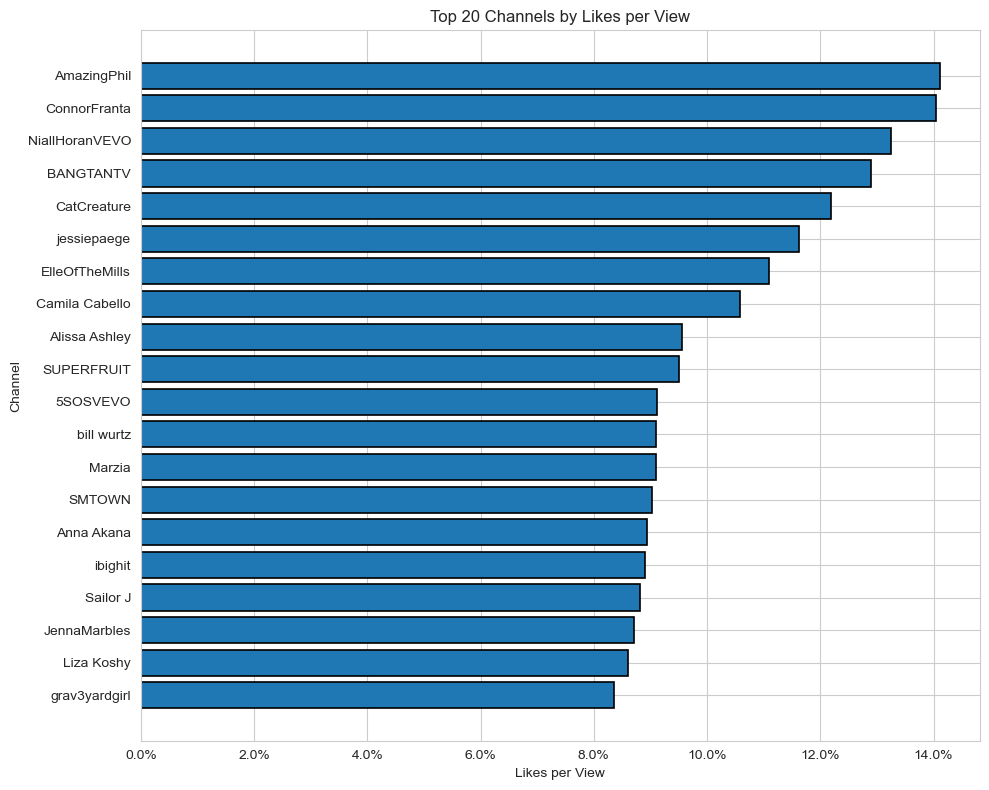

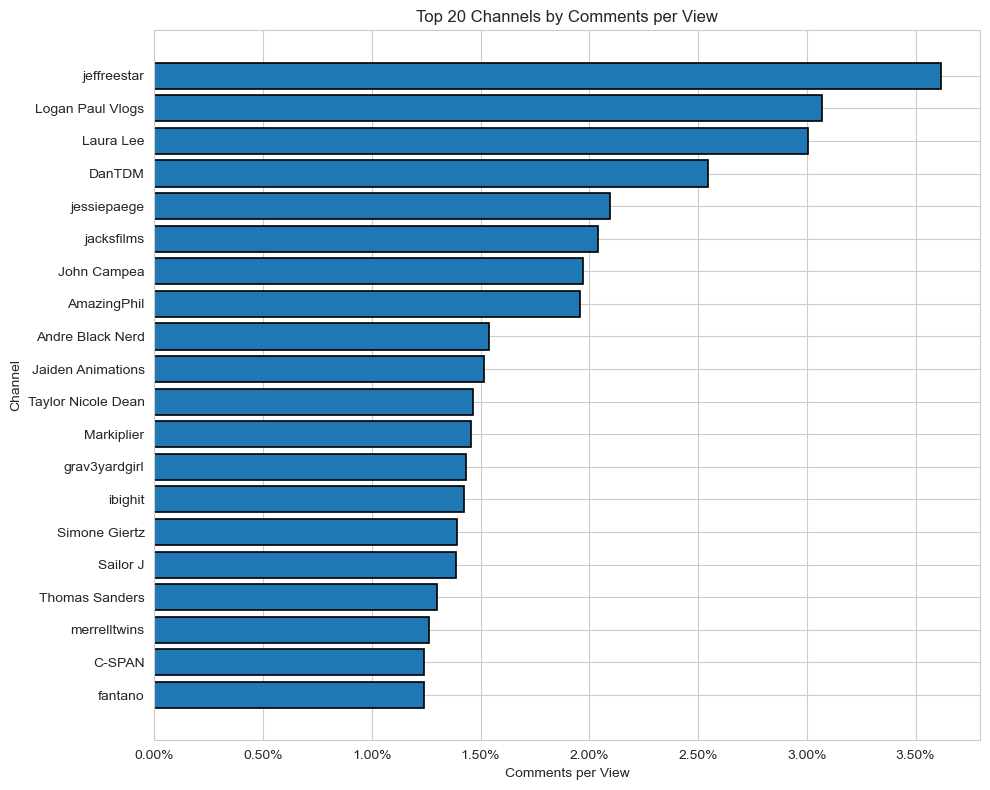

In [ ]:
channel_df = (
    yt_df.groupby("channel_title")
         .agg(
             videos=("video_id", "nunique"),
             total_views=("views", "sum"),
             total_likes=("likes", "sum"),
             total_comments=("comment_count", "sum"),
         )
         .reset_index()
)

channel_df["like_rate"] = (channel_df["total_likes"] / channel_df["total_views"]).clip(upper=0.5)
channel_df["comment_rate"] = (channel_df["total_comments"] / channel_df["total_views"]).clip(upper=0.5)

# drops outlier low videos
min_videos = 3
min_total_views = 1_000_000
filtered = channel_df[(channel_df["videos"] >= min_videos) & (channel_df["total_views"] >= min_total_views)]

# Pick Top 20 for each metric
top_like = filtered.sort_values("like_rate", ascending=False).head(20)
top_comment = filtered.sort_values("comment_rate", ascending=False).head(20)

def barh_percent(df, x_col, y_col, title, x_label):
    plt.figure(figsize=(10, 8))
    plt.barh(
        df[y_col],
        df[x_col],
        edgecolor='black',
        linewidth=1.2
    )
    plt.gca().invert_yaxis()
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
    plt.xlabel(x_label)
    plt.ylabel("Channel")
    plt.title(title)
    plt.tight_layout()
    plt.show()

barh_percent(
    df=top_like,
    x_col="like_rate",
    y_col="channel_title",
    title="Top 20 Channels by Likes per View",
    x_label="Likes per View"
)

barh_percent(
    df=top_comment,
    x_col="comment_rate",
    y_col="channel_title",
    title="Top 20 Channels by Comments per View",
    x_label="Comments per View"
)
